In [1]:
import overtime as ot

In [2]:
network = ot.TemporalDiGraph('TflNetwork', data=ot.CsvInput('./data/victoria_central_bakerloo_piccadilly-inbound_outbound.csv'))

In [3]:
# further into sampled data timespan.
sub_network2 = network.get_temporal_subgraph((900, 910))
sub_network2.nodes.add_data('./data/victoria_central_bakerloo_piccadilly-stations.csv')
for node in sub_network2.nodes.set:
    node.data['reachability'] = ot.calculate_reachability(sub_network2, node.label)

In [4]:
# show Oxford Circus' foremost tree.
oxcircus_tree = ot.calculate_foremost_tree(sub_network2, 'Oxford Circus')
oxcircus_tree.nodes.add_data('./data/victoria_central_bakerloo_piccadilly-stations.csv')

/media/sf_Code/University/COMP702/overtime/overtime/plots/scatter.py:113: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.figure.show()


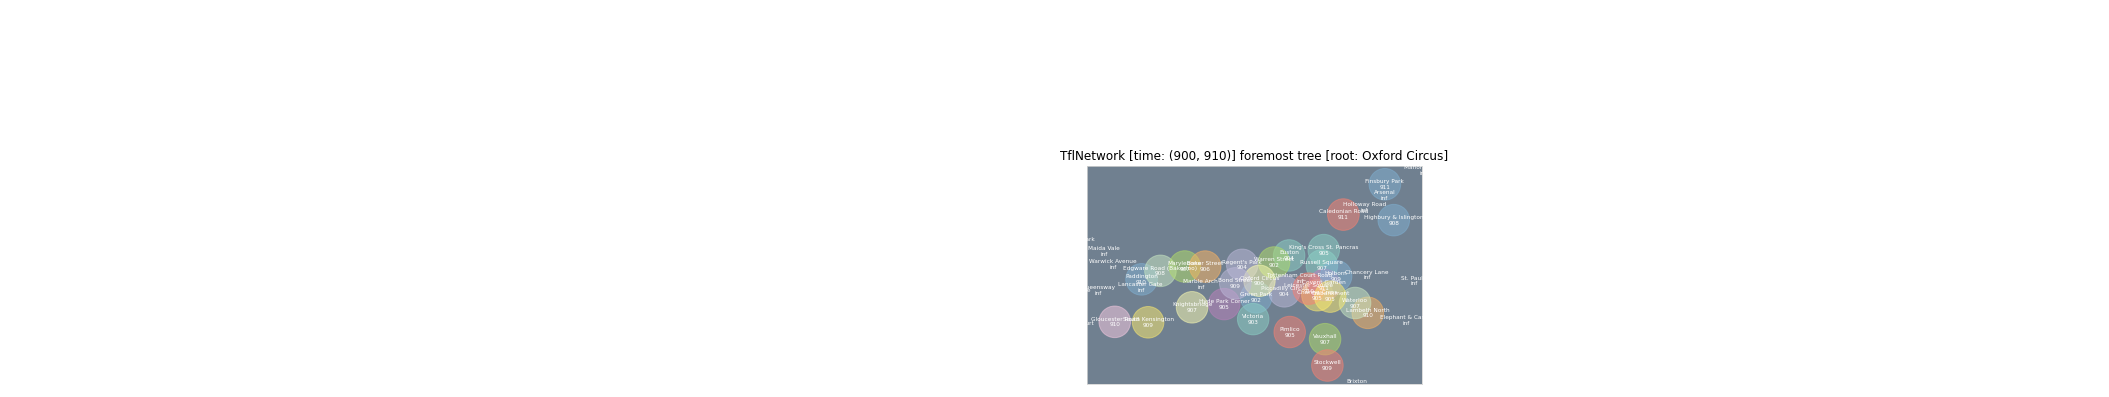

In [5]:
ot.NodeScatter(oxcircus_tree, x='lon', y='lat', bubble_metric='foremost_time')